### 为什么7月比6月销售额会下降
根据调查，可能的原因是商业宣传减少的原因导致7月的销售额下降，现在要通过数据验证是否是商业宣传活动减少，导致新用户的下降，从而销售额下降

In [1]:
# 加载python所需模块
import pandas as pd
import numpy as np #之后需要用到
import seaborn as sns
from datetime import datetime
import matplotlib as mpl #设置环境变量
import matplotlib.pyplot as plt #绘图专用
from mpl_toolkits.mplot3d import Axes3D #绘制3D图
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus']=False

DAU:每天至少来访一次的用户数据

In [2]:
dau = pd.read_csv('./data/section3-dau.csv')
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


DPU：每天至少消费1日元的用户数据

In [3]:
dpu = pd.read_csv('./data/section3-dpu.csv')
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


Install:记录每个用户首次下载这个游戏的时间的数据

In [4]:
install = pd.read_csv('./data/section3-install.csv')
install.head(5)

,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


为了验证假设，是否是新用户消费额减少导致的，要调查6，7月份新用户的消费额，同时要和老用户对比，也要看老用户的消费额。
而新用户是只第一次下载，登录和消费都是在同一个月，所以要把三个数据链接起来

In [5]:
dau_install = dau.merge(install, how='left', on=['user_id', 'app_name'])
dau_dpu_install = dau_install.merge(dpu, how='left', on=['user_id', 'app_name', 'log_date'])
dau_dpu_install.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-01,game-01,13491,2013-06-01,NaN
2,2013-06-01,game-01,7006,2013-05-03,NaN
3,2013-06-01,game-01,117,2013-04-17,NaN
4,2013-06-01,game-01,13492,2013-06-01,NaN


In [6]:
dau_dpu_install.payment.fillna(0, inplace=True)

In [7]:
dau_dpu_install.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-01,game-01,13491,2013-06-01,0.0
2,2013-06-01,game-01,7006,2013-05-03,0.0
3,2013-06-01,game-01,117,2013-04-17,0.0
4,2013-06-01,game-01,13492,2013-06-01,0.0


#### 按月统计

In [9]:
dau_dpu_install.log_date = pd.to_datetime(dau_dpu_install['log_date']).map(lambda x : x.strftime("%Y-%m"))

In [11]:
dau_dpu_install.install_date = pd.to_datetime(dau_dpu_install['install_date']).map(lambda x : x.strftime("%Y-%m"))

下载时间和访问时间是同月份的被视为新用户    
给新老用户添加标签,0表示老用户，1表示新用户

In [16]:
dau_dpu_install.head()

,log_date,app_name,user_id,install_date,payment,is_new
0,2013-06,game-01,116,2013-04,0.0,0
1,2013-06,game-01,13491,2013-06,0.0,1
2,2013-06,game-01,7006,2013-05,0.0,0
3,2013-06,game-01,117,2013-04,0.0,0
4,2013-06,game-01,13492,2013-06,0.0,1


In [31]:
mau_payment = dau_dpu_install[['log_date', 'user_id', 'install_date', 'payment']]

In [40]:
mau_payment['is_new'] = mau_payment.apply(lambda x: '新用户' if x.log_date == x.install_date else '老用户', axis=1)

C:\Users\TurboLoong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


统计6，7月每个月的新老用户

In [77]:
mau_payment.head()

,log_date,user_id,install_date,payment,is_new
0,2013-06,116,2013-04,0.0,老用户
1,2013-06,13491,2013-06,0.0,新用户
2,2013-06,7006,2013-05,0.0,老用户
3,2013-06,117,2013-04,0.0,老用户
4,2013-06,13492,2013-06,0.0,新用户


In [42]:
user_type_payment = mau_payment.groupby(['log_date', 'is_new']).sum().loc[:,['payment']].reset_index()

In [43]:
user_type_payment.head()

,log_date,is_new,payment
0,2013-06,新用户,49837.0
1,2013-06,老用户,177886.0
2,2013-07,新用户,29199.0
3,2013-07,老用户,177886.0


In [44]:
user_type_payment = user_type_payment.pivot_table(index='log_date', columns='is_new',values='payment').reset_index()
user_type_payment.head()

is_new,log_date,新用户,老用户
0,2013-06,49837.0,177886.0
1,2013-07,29199.0,177886.0


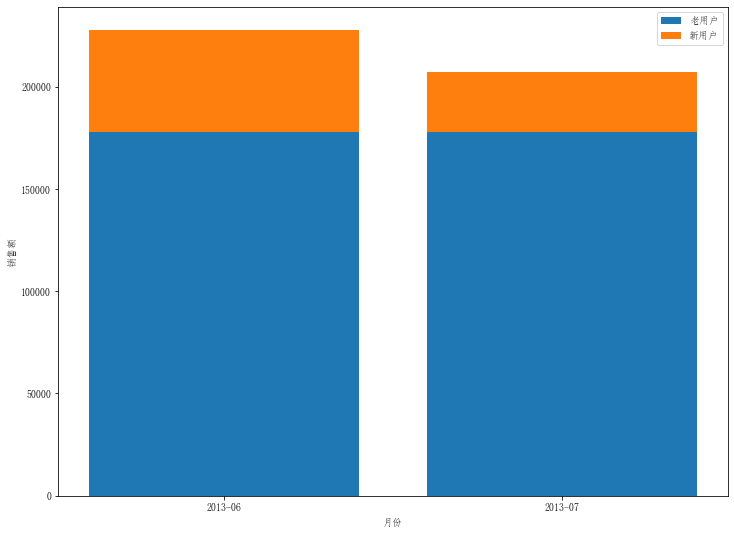

In [54]:
plt.figure(figsize=(12,9))
x= user_type_payment['log_date']
old = user_type_payment.loc[:,'老用户'] 
new1 = user_type_payment.loc[:, '新用户']
plt.bar(x, old, label="老用户")
plt.bar(x, new1, bottom=old,label = '新用户')
plt.xlabel('月份')
plt.ylabel('销售额')
plt.legend(loc='best')
plt.show()

从表中可以看出，老用户的销售额没有变化，新用户的销售额下降比较多

In [79]:
new_mau_payment = mau_payment.loc[(mau_payment['is_new'] == '新用户') & (mau_payment['payment']>0), :]

In [83]:
new_mau_payment = new_mau_payment.groupby(['log_date', 'user_id']).sum().reset_index()

In [87]:
new_mau_payment['payment_period']=pd.cut(new_mau_payment['payment'], range(0, int(max(new_mau_payment['payment']))+2000, 2000), right=False)

In [92]:
new_mau_payment = new_mau_payment.groupby(['payment_period', 'log_date']).count().loc[:, ['user_id']].reset_index()

In [97]:
payment_count = new_mau_payment.rename(columns={'user_id': 'user_count'})

In [99]:
payment_count.user_count.fillna(0, inplace=True)

In [100]:
x = payment_count['payment_period'].unique()
x

[[0, 2000), [2000, 4000), [4000, 6000), [6000, 8000), [8000, 10000), [10000, 12000), [12000, 14000)]
Categories (7, interval[int64]): [[0, 2000) < [2000, 4000) < [4000, 6000) < [6000, 8000) < [8000, 10000) < [10000, 12000) < [12000, 14000)]

In [107]:
y1 = payment_count.loc[payment_count['log_date'] == '2013-06', 'user_count']

In [114]:
y2 = payment_count[payment_count['log_date'] == '2013-07']['user_count']

In [109]:
x = x.astype(str)

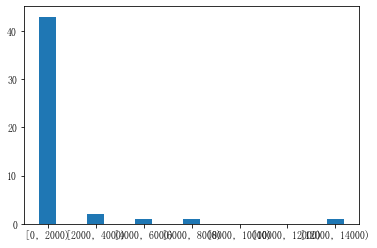

In [118]:
plt.bar(x, y1, 0.35, label='2013-06')
# plt.bar(x, y2, 0.35, label='2013-07')
plt.show()